In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
tsv_file_path = r'C:\Users\alexa\Desktop\Eye Tracking Quality control\subject-5.tsv'
csv_file_path = r'C:\Users\alexa\Desktop\Eye Tracking Quality control\subject-5.csv'
log_file_path = r'C:\Users\alexa\Desktop\Eye Tracking Quality control\subject-5_log.txt'

In [3]:
# tsv file - check if all log messages are present
tsv_dataframe = pd.read_csv(tsv_file_path, sep='\t')
#tsv_dataframe.head()

# get all entries where USER is not NaN
user_entries = tsv_dataframe[tsv_dataframe['USER'].notna()]
#display(user_entries.head(10))

# check if START_TRAIL and STOP_TRIAL are present
count_start = user_entries['USER'].str.contains('START_TRIAL').sum()
count_end = user_entries['USER'].str.contains('STOP_TRIAL').sum()
print(f"Number of START_TRIAL entries: {count_start}") # should be 1
print(f"Number of END_TRIAL entries: {count_end}") # should be 1

# check how many FIXATION_LOG entries are present
fixation_count = user_entries['USER'].str.contains('FIXATION_LOG').sum()
print(f"Number of FIXATION_LOG entries: {fixation_count}") # should be 1 per trial -> 120 in total

# check if all TRIAL [trial_number]: ... are present and do not contain END
# Count TRIAL entries that do not contain 'END'
trials_start = user_entries['USER'].str.contains(r'TRIAL \d+:') & ~user_entries['USER'].str.contains('END')
trials_start_count = trials_start.sum()
print(f"Number of TRIAL start entries: {trials_start_count}") # should be 1 per trial -> 120 in total

# check if all TRIAL [trial_number]: END are present
trials_end = user_entries['USER'].str.contains(r'TRIAL \d+: END')
trials_end_count = trials_end.sum()
print(f"Number of TRIAL END entries: {trials_end_count}") # should be 1 per trial -> 120 in total

# TODO: check if all TRIAL [trial_number]: ... have a corresponding TRIAL [trial_number]: END entry

Number of START_TRIAL entries: 1
Number of END_TRIAL entries: 1
Number of FIXATION_LOG entries: 120
Number of TRIAL start entries: 120
Number of TRIAL END entries: 120


Text(0, 0.5, 'Duration (seconds)')

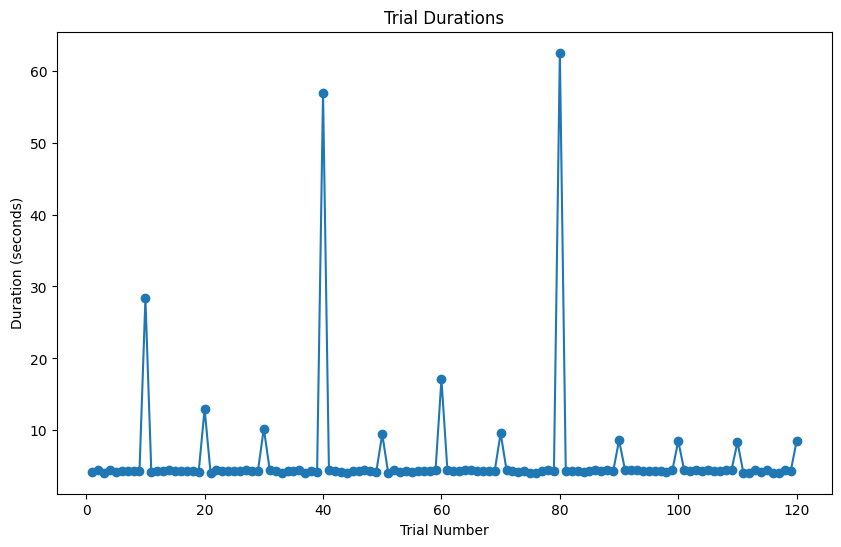

In [4]:
# TODO: tsv file - check timestamps in some sort (maybe check if each trail took the same amount of time, and max time between two entries)
#display(tsv_dataframe.head(10))

# split the dataframe into smaller dataframes for each trial
trials = []
for i in range(1, 121):
    # Find the index of the trial start and end
    trial_start_idx = user_entries[user_entries['USER'].str.contains(f'TRIAL {i}:') & ~user_entries['USER'].str.contains('END')].index
    trial_end_idx = user_entries[user_entries['USER'].str.contains(f'TRIAL {i}: END')].index

    if not trial_start_idx.empty and not trial_end_idx.empty:
        # Select all rows between start and end (inclusive) from the original tsv_dataframe
        start_idx = trial_start_idx[0]
        end_idx = trial_end_idx[0]
        trial_data = tsv_dataframe.loc[start_idx:end_idx]
        trials.append(trial_data)

# compute the duration of each trial
trial_durations = []
for trial in trials:
    # Calculate the duration of the trial using TIME (in seconds)
    if not trial.empty:
        duration_sec = trial['TIME'].max() - trial['TIME'].min()
        trial_durations.append(duration_sec)

# Plot the trial durations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(trial_durations) + 1), trial_durations, marker='o')
plt.title('Trial Durations')   
plt.xlabel('Trial Number')
plt.ylabel('Duration (seconds)')


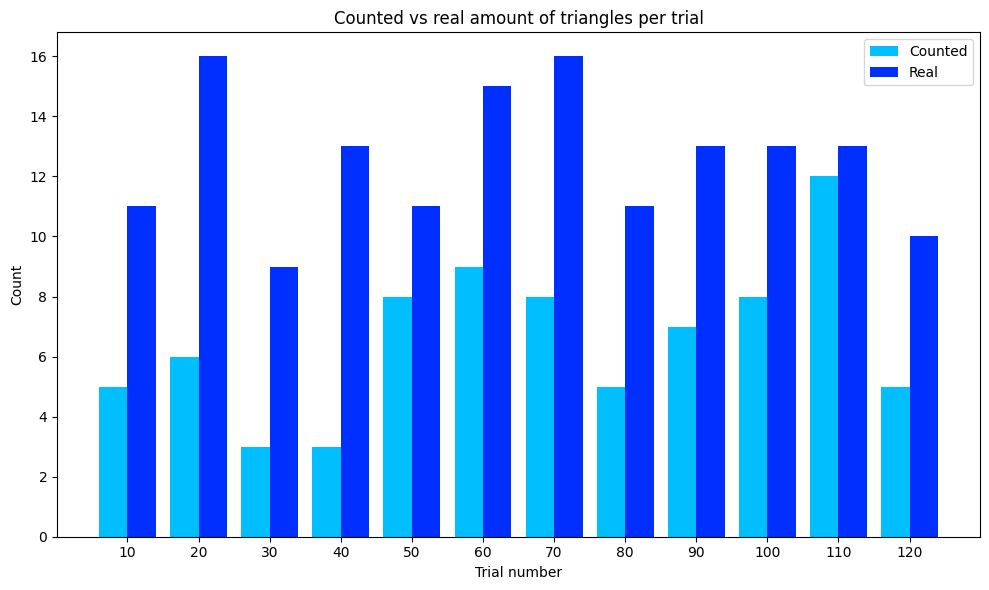

Total real triangles: 151
Total triangles counted: 79
Percentage of counted triangles: 52.32%


: 

In [ ]:
# csv file - check if the real number of triangles matched with the counted number of triangles

csv_file_text = ''
with open(csv_file_path, 'r') as file:
    csv_file_text = file.read()

pattern = r"Trial Number: (\d+), Triangles counted: (\d+), real number: (\d+)"
matches = re.findall(pattern, csv_file_text)

triangle_data = pd.DataFrame(matches, columns=["trial_number", "triangles_counted", "real_number"]).astype(int)
total_counted = triangle_data['triangles_counted'].sum()
total_real = triangle_data['real_number'].sum()

# plot the data
plt.figure(figsize=(10, 6))
bar_width = 0.4
x = np.arange(len(triangle_data['trial_number']))

# Define custom colors
counted_color = '#01beff'  # '#01beff', '#002fff'
real_color = '#002fff'     

plt.bar(x - bar_width/2, triangle_data['triangles_counted'], width=bar_width, label='Counted', alpha=1, color=counted_color)
plt.bar(x + bar_width/2, triangle_data['real_number'], width=bar_width, label='Real', alpha=1, color=real_color)
plt.xlabel('Trial number')
plt.ylabel('Count')
plt.title('Counted vs real amount of triangles per trial')
plt.xticks(x, triangle_data['trial_number'])
plt.legend()
plt.tight_layout()
plt.show()

print(f"Total real triangles: {total_real}")
print(f"Total triangles counted: {total_counted}")
print(f"Percentage of counted triangles: {total_counted / total_real * 100:.2f}%")

In [6]:
# Eye Tracker log - Start and End log message of every Trial
log_file_text = ''
with open(log_file_path, 'r') as file:
    log_file_text = file.read()

# check if start_trial and stop_trial are present
start_count = log_file_text.count('start_trial')
end_count = log_file_text.count('stop_trial')
print(f"Number of start_trial entries: {start_count}") # should be 1
print(f"Number of stop_trial entries: {end_count}") # should be 1

# check how many fixation_log entries are present
fixation_log_count = log_file_text.count('fixation_log')
print(f"Number of fixation_log entries: {fixation_log_count}") # should be 1 per trial -> 120 in total

# check if all Trial [trial_number]: ... are present and do not contain end
trials_start = re.findall(r'Trial (\d+):(?!.*end)', log_file_text)
trials_start_count = len(trials_start)
print(f"Number of Trial start entries: {trials_start_count}") # should be 1 per trial -> 120 in total 

# check if all Trial [trial_number]: end are present
trials_end = re.findall(r'Trial (\d+): end', log_file_text)
trials_end_count = len(trials_end)
print(f"Number of Trial END entries: {trials_end_count}") # should be

Number of start_trial entries: 1
Number of stop_trial entries: 1
Number of fixation_log entries: 120
Number of Trial start entries: 120
Number of Trial END entries: 120


In [7]:
# TODO: Eye Tracker log - cb_index identical with trial document
